In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ -9.05428188,  -4.92980495],
       [  4.96572136,   6.04463406],
       [  3.31506372, -10.10146894],
       ...,
       [ -7.8238641 ,  -4.6921766 ],
       [  1.38369615, -10.92696238],
       [  2.81834766, -10.78752023]], shape=(1000, 2))

In [5]:
y

array([2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2,
       0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2,

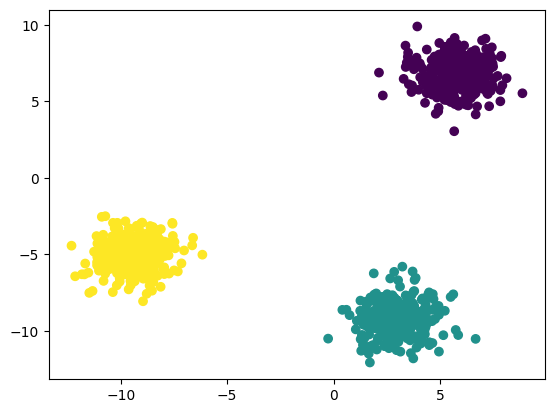

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [13]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[1339.999999999999,
 444.7411447513882,
 28.904637182136373,
 25.86092827594155,
 22.967511936977715,
 20.79839091013322,
 17.543950688605598,
 17.708160679139457,
 13.397301889418614,
 12.35597483366624]

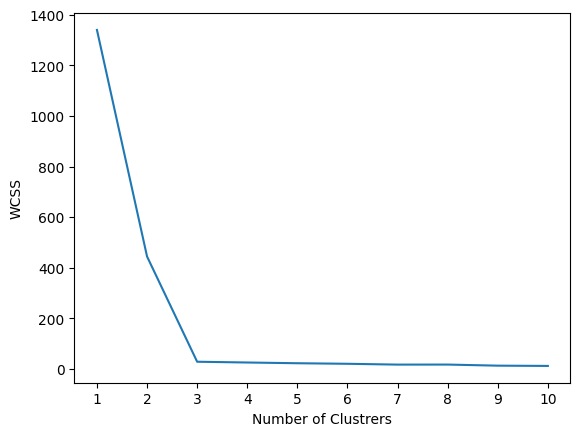

In [17]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,

In [20]:
y_pred=kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2,
       0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0,

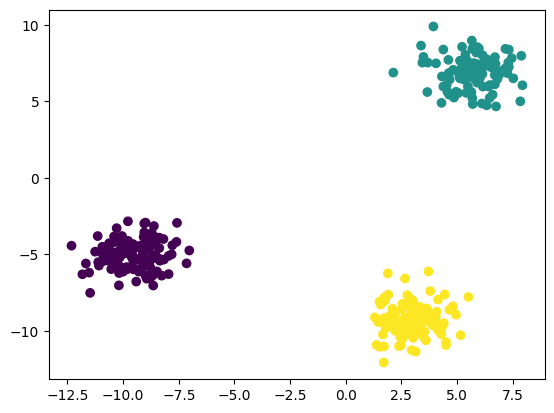

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [26]:
## kneelocator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from kneed import KneeLocator

In [28]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [31]:
print(kl.elbow)

3


In [30]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.6845456124893025,
 0.8746504962218767,
 0.6735611663987835,
 0.4966312482309645,
 0.3070383625334098,
 0.3089569842555272,
 0.32414537084733214,
 0.30341130988963694,
 0.32358451493865364]

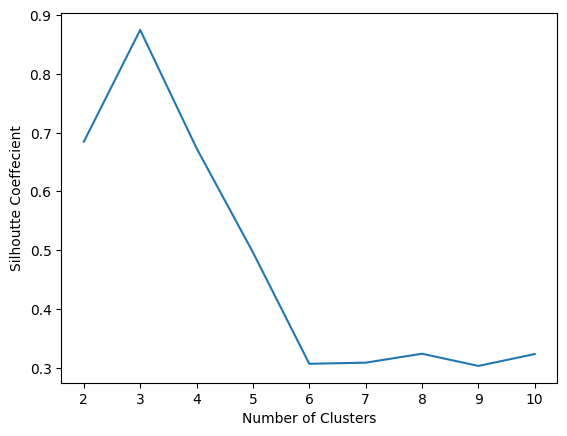

In [35]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()